In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib

import pandas as pd
import scipy.io
import numpy as np
import seaborn
import math

In [2]:
df = pd.read_csv('data/neuron_post_processing_fixed.csv')
df.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Network science of biological systems at different scales: A review

![title](img/G1.png)

[Source](https://www.sciencedirect.com/science/article/pii/S1571064517301501)

In [3]:
group_time = 100

df['time (ms)'] = df['time'].apply(lambda x: math.floor((x / group_time)) * group_time)
df.head()

,neuron,time,mean,std,sum,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,time (ms)
0,0,0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.047619,0.218218,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_group_time = df[['neuron', 'time (ms)', 'sum']].\
    groupby(by=['neuron','time (ms)'], as_index=False).sum()
    
df_group_time.head()

,neuron,time (ms),sum
0,0,0,12
1,0,100,13
2,0,200,8
3,0,300,12
4,0,400,14


In [5]:
TOP_N = 10

top_n_neurons = \
    df_group_time[['neuron', 'sum']].\
        groupby(by='neuron', as_index=False)\
            .sum().\
                sort_values(by=['sum'], ascending=False)['neuron'][:TOP_N].tolist()
                
top_n_neurons

[185, 52, 24, 214, 248, 168, 130, 315, 318, 216]

In [6]:
df_group_plot = df_group_time.loc[df_group_time['neuron'].isin(top_n_neurons)].\
                    groupby(by=['time (ms)','neuron']).sum().unstack()
    
df_group_plot = df_group_plot[df_group_plot.columns.set_levels(top_n_neurons, level=1)]

## Graph B

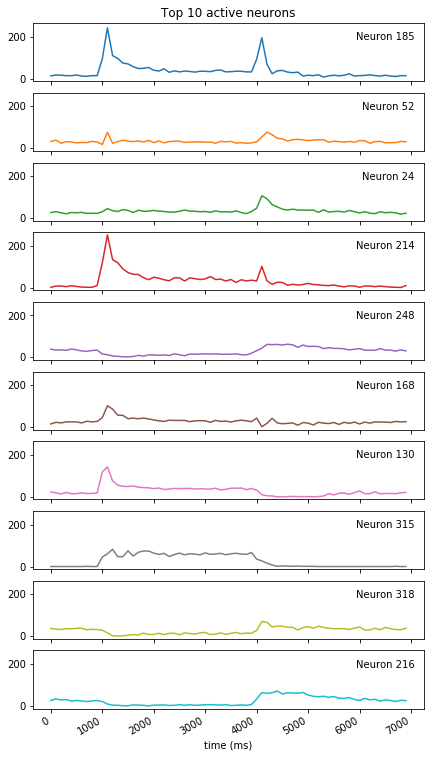

In [7]:
_ = df_group_plot.plot(subplots=True, figsize=(7,14), sharey=True)

__ = [ax.legend(loc=1,
                frameon=False,
                handlelength=0).\
                texts[0].set_text('Neuron ' + str(top_n_neurons[idx])) \
      for idx, ax in enumerate(plt.gcf().axes)]

__ = _[0].set_title('Top {} active neurons'.format(TOP_N))

## Graph C

In [8]:
df_group_time = df_group_time.rename({'sum':'Neuron'}, axis='columns')

In [9]:
TOP_N = 10

top_n_neurons = \
    df_group_time[['neuron', 'Neuron']].\
        groupby(by='neuron', as_index=False)\
            .sum().\
                sort_values(by=['Neuron'], ascending=False)['neuron'][:TOP_N].tolist()
                
print(top_n_neurons)

[185, 52, 24, 214, 248, 168, 130, 315, 318, 216]


In [10]:
df_corr_10 = df_group_time.loc[df_group_time['neuron'].isin(top_n_neurons)].\
                 groupby(by=['time (ms)','neuron']).sum().unstack().corr(method='pearson')

df_corr_10 = df_corr_10[df_corr_10.columns.set_levels(top_n_neurons, level=1)]

df_corr_10.head()

Neuron                                                    \
neuron              185       52        24        214       248       168   
       neuron                                                               
Neuron 24      0.548258  0.713549  1.000000  0.297713  0.309576 -0.045744   
       52      0.446828  1.000000  0.713549  0.307511  0.407367  0.120259   
       130     0.656906 -0.053915 -0.106670  0.838644 -0.736653  0.814963   
       168     0.625176  0.120259 -0.045744  0.801655 -0.576258  1.000000   
       185     1.000000  0.446828  0.548258  0.906167 -0.303490  0.625176   

                                                       
neuron              130       315       318       216  
       neuron                                          
Neuron 24     -0.106670  0.044759  0.401564  0.448190  
       52     -0.053915 -0.136675  0.405969  0.471954  
       130     1.000000  0.691794 -0.638249 -0.665872  
       168     0.814963  0.556374 -0.580395 -0.502921  
       185     0.656906  0.454527 -0.162236 -0.136900

In [11]:
df_corr_10.columns

MultiIndex(levels=[['Neuron'], [24, 52, 130, 168, 185, 214, 216, 248, 315, 318]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 1, 0, 5, 7, 3, 2, 8, 9, 6]],
           names=[None, 'neuron'])

In [12]:
import seaborn as sns

sns.set_context("notebook")
sns.set_palette("viridis")

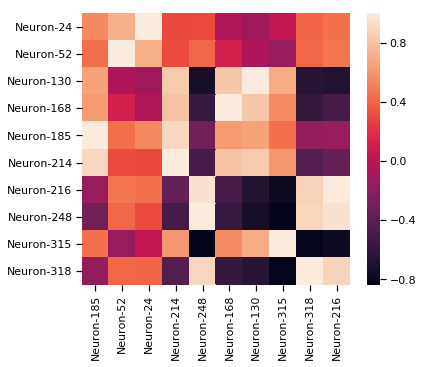

In [13]:
fig, ax = plt.subplots(figsize=(6,5)) 
sns.heatmap(df_corr_10)
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')

In [14]:
df_corr = df_group_time.\
                 groupby(by=['time (ms)','neuron']).sum().unstack().corr(method='pearson')
df_corr.head()

Neuron                                                    \
neuron              0         1         2         3         4         5     
       neuron                                                               
Neuron 0       1.000000  0.493311 -0.353864  0.121851  0.334601  0.243360   
       1       0.493311  1.000000 -0.003087  0.133458  0.385215  0.312137   
       2      -0.353864 -0.003087  1.000000  0.633332  0.479451  0.501478   
       3       0.121851  0.133458  0.633332  1.000000  0.876969  0.930725   
       4       0.334601  0.385215  0.479451  0.876969  1.000000  0.964363   

                                                         ...               \
neuron              6         7         8         9      ...          309   
       neuron                                            ...                
Neuron 0       0.728744  0.134260  0.103436  0.871038    ...     0.239748   
       1       0.547897  0.133484  0.210007  0.622886    ...     0.431555   
       2      -0.055849  0.582854  0.501886 -0.277463    ...     0.661346   
       3       0.368715  0.967003  0.896568  0.092960    ...     0.773221   
       4       0.600428  0.923659  0.884711  0.348690    ...     0.850083   

                                                                           \
neuron              310       311       312       313       314       315   
       neuron                                                               
Neuron 0      -0.619058 -0.021115  0.363660 -0.264175 -0.393282 -0.695220   
       1      -0.000934  0.186518  0.463857 -0.064781 -0.149855  0.092589   
       2       0.793399  0.828124  0.463728  0.861596  0.859608  0.582130   
       3       0.511800  0.767525  0.412389  0.589084  0.513365  0.165683   
       4       0.379805  0.647754  0.588929  0.331522  0.236508  0.126503   

                                             
neuron              316       317       318  
       neuron                                
Neuron 0       0.138580  0.091930  0.878811  
       1       0.145043  0.284584  0.275918  
       2       0.523885  0.624154 -0.444320  
       3       0.943804  0.872289  0.046488  
       4       0.866881  0.896494  0.175564  

[5 rows x 319 columns]

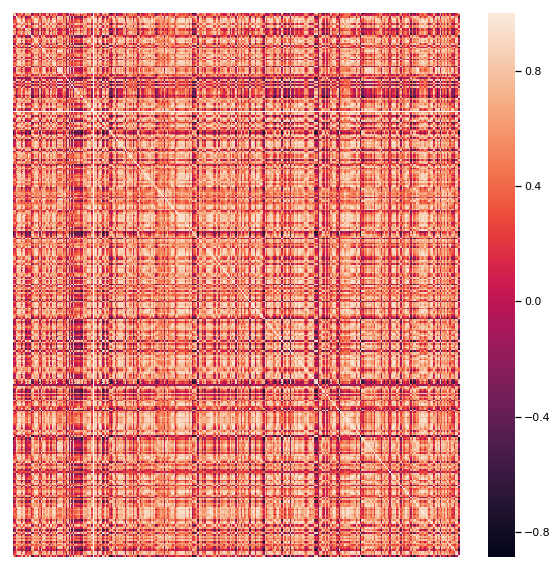

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_corr, xticklabels=[], yticklabels=[])
_ = ax.set_ylabel('')    
_ = ax.set_xlabel('')